Autocorrelation match: True
Decor Scale match: False
Decor Scale (ref) = 0.2210
Decor Scale (opt) = 0.2246


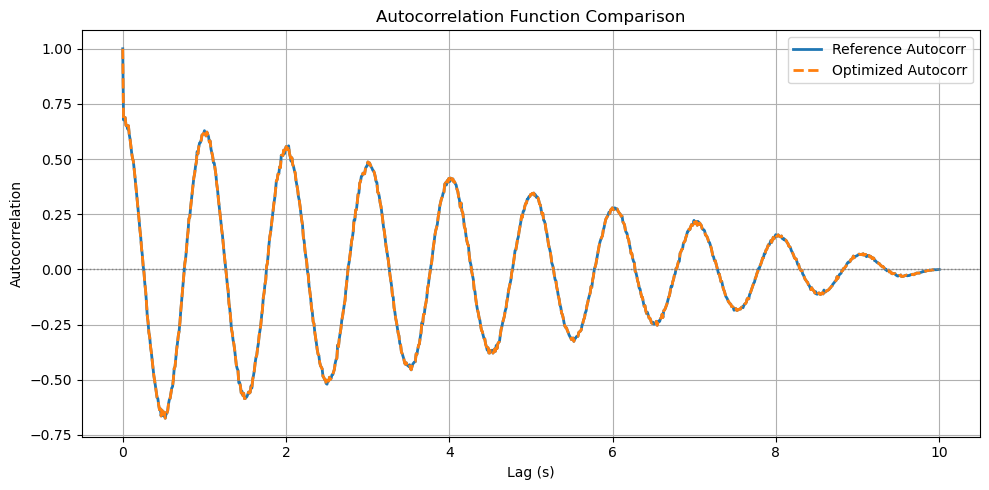

In [5]:
import numpy as np
import sys
import matplotlib.pyplot as plt

# Set path to access python functions
ROOT = '/Users/lukecolosi/Desktop/projects/graduate_research/Gille_lab/'
sys.path.append(ROOT + 'AirSeaCoupling/tools/')

#--- Other Functions ---# 
from autocorr import compute_autocorr_optimize, compute_decor_scale_optimize, compute_autocorr, compute_decor_scale

# Create noisy sinusoidal data
np.random.seed(0)
N = 1000
t = np.linspace(0, 10, N)
dt = t[1] - t[0]
signal = np.sin(2 * np.pi * 1 * t)  # 1 Hz sine
noise = 0.5 * np.random.randn(N)
x = signal + noise

# Create x as coordinate vector and mask version of x for legacy function
x_coord = t.copy()
x_masked = np.ma.masked_invalid(x)

# Set autocorrelation parameters
lag = 1000
bias_autocor = 'biased'
bias_decor = 'unbiased'
norm = 0

# --- Compute autocorrelation ---
rho_pos_ref, rho_neg_ref, _, _, x_ref_pos_ref, _ = compute_autocorr(x_masked, x_coord, lag, bias_autocor, norm)
rho_pos_opt, rho_neg_opt, _, _, x_ref_pos_opt, _ = compute_autocorr_optimize(x, x_coord, lag, bias_autocor, norm)

# --- Compare autocorrelation ---
autocorr_match = np.allclose(rho_pos_ref, rho_pos_opt, equal_nan=True)
print("Autocorrelation match:", autocorr_match)

# --- Compute decorrelation scales ---
scale_ref = compute_decor_scale(rho_pos_ref, x_ref_pos_ref, dt, bias_decor, norm)
scale_opt = compute_decor_scale_optimize(rho_pos_opt, x_ref_pos_opt, dt, bias_decor, norm)

# --- Compare decorrelation scale ---
decor_match = np.allclose(scale_ref, scale_opt, equal_nan=True)
print("Decor Scale match:", decor_match)
print(f"Decor Scale (ref) = {scale_ref:.4f}")
print(f"Decor Scale (opt) = {scale_opt:.4f}")

# --- Plot autocorrelation ---
plt.figure(figsize=(10, 5))
plt.plot(x_ref_pos_ref, rho_pos_ref, label='Reference Autocorr', linewidth=2)
plt.plot(x_ref_pos_opt, rho_pos_opt, '--', label='Optimized Autocorr', linewidth=2)
plt.axhline(0, color='gray', linestyle=':', linewidth=1)
plt.xlabel('Lag (s)')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
